In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go


%matplotlib inline

In [ ]:
netflix_df = pd.read_csv("./netflix_titles.csv")

In [ ]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


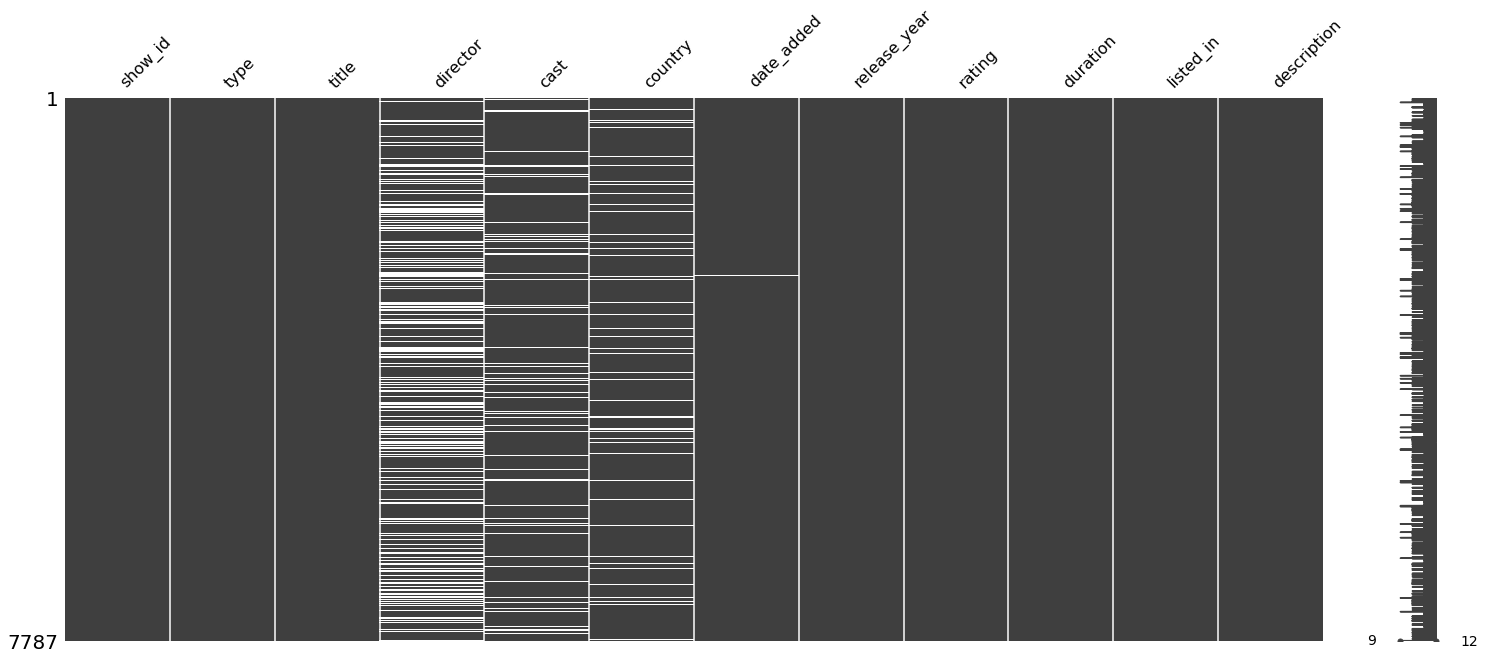

In [ ]:
# 데이터 결측치 분포도

msno.matrix(netflix_df)

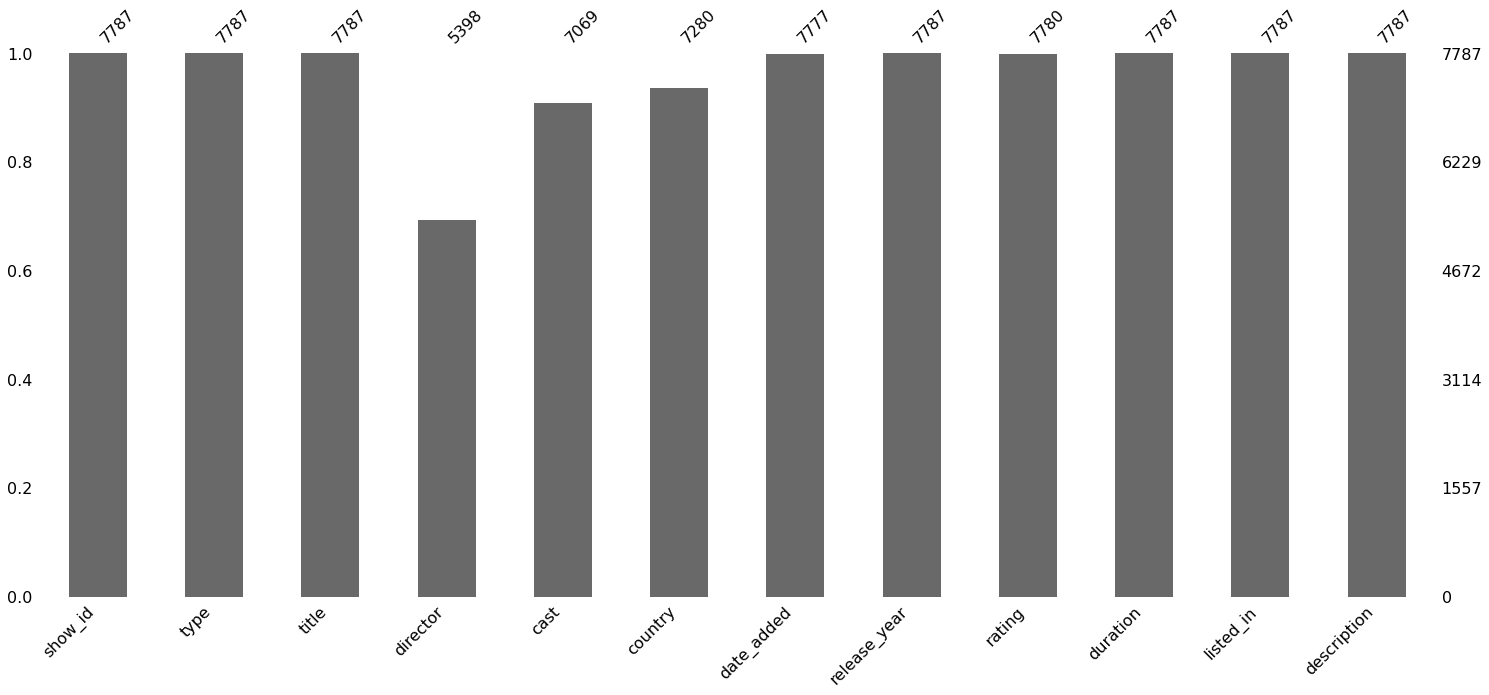

In [ ]:
# 결측치 차트

msno.bar(netflix_df);

# 총 7787건인데, 각 컬럼별로 그 숫자가 안되면 비어 있는것이 있다는 의미이다.
# director, cast, country, date_added, rating 에서 빈 값들이 있다는 것을 확인 할 수 있습니다.

In [ ]:
netflix_df.isnull().sum()

# director, cast, country,date_added, rating, duration에서 결측치 발견

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# 결측치 비율

for i in netflix_df.columns:
    null_rate = netflix_df[i].isna().sum() / len(netflix_df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))


director's null rate :30.68%
cast's null rate :9.22%
country's null rate :6.51%
date_added's null rate :0.13%
rating's null rate :0.09%


In [ ]:
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

# **결측치 보정**

In [ ]:
rating_replacements = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}

for id, rate in rating_replacements.items():
    netflix_df.iloc[id, 8] = rate
    
netflix_df['rating'].isna().sum()


0

In [ ]:
# 결측치가 많은 director와 cast 컬럼은 drop 

netflix_df = netflix_df.drop(['director', 'cast'], axis=1)
netflix_df.columns


Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix_df=netflix_df[netflix_df["date_added"].notna()]


In [ ]:
netflix_df.isnull().sum()

show_id           0
type              0
title             0
country         506
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])

In [ ]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# **분석을 위한 데이터 컬럼 추가 하기**

In [ ]:
# year_added 컬럼 추가 하기
netflix_df['year_added'] = netflix_df['date_added'].apply(lambda x: x.split(" ")[-1])

# month_added 컬럼 추가 하기
netflix_df['month_added'] = netflix_df['date_added'].apply(lambda x: x.split(" ")[0])

# 추가한 컬럼 데이터 확인
netflix_df.head()


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January


In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_df['target_ages'] = netflix_df['rating'].replace(ratings_ages)
netflix_df['target_ages'].unique()


array(['Adults', 'Teens', 'Older Kids', 'Kids', 'TV-MA '], dtype=object)

# **데이터 타입 변경 하기**

In [ ]:
# type 컬럼은 category로 변경 합니다.
netflix_df['type'] = pd.Categorical(netflix_df['type'])

# target_ages 역시 category 로 변경 합니다.
netflix_df['target_ages'] = pd.Categorical(netflix_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year_added 는 integer로 변경 합니다. 그래야 released_year 데이터와 비교 할 수 있겠죠.
netflix_df['year_added'] = pd.to_numeric(netflix_df['year_added'])

netflix_df.dtypes


show_id           object
type            category
title             object
country           object
date_added        object
release_year       int64
rating            object
duration          object
listed_in         object
description       object
year_added         int64
month_added       object
target_ages     category
dtype: object

# **데이터 시각화 하기**

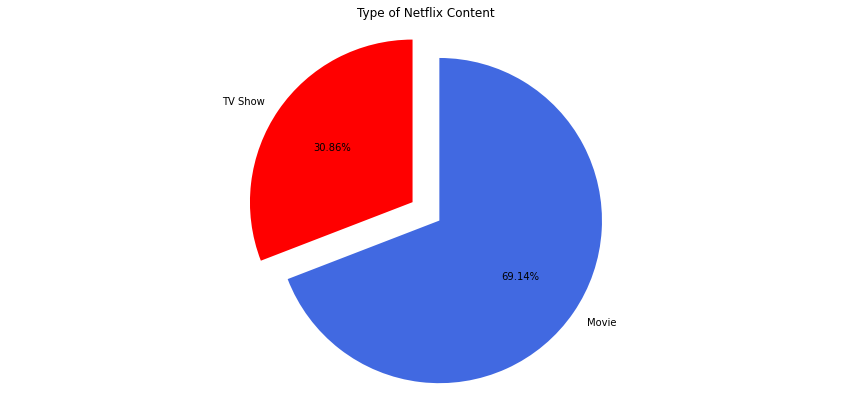

In [ ]:
plt.figure(figsize=(15, 7))
labels=['TV Show', 'Movie']
plt.pie(netflix_df['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['red','royalblue'], startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()


In [ ]:
df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movies = netflix_df[netflix_df["type"] == "Movie"]


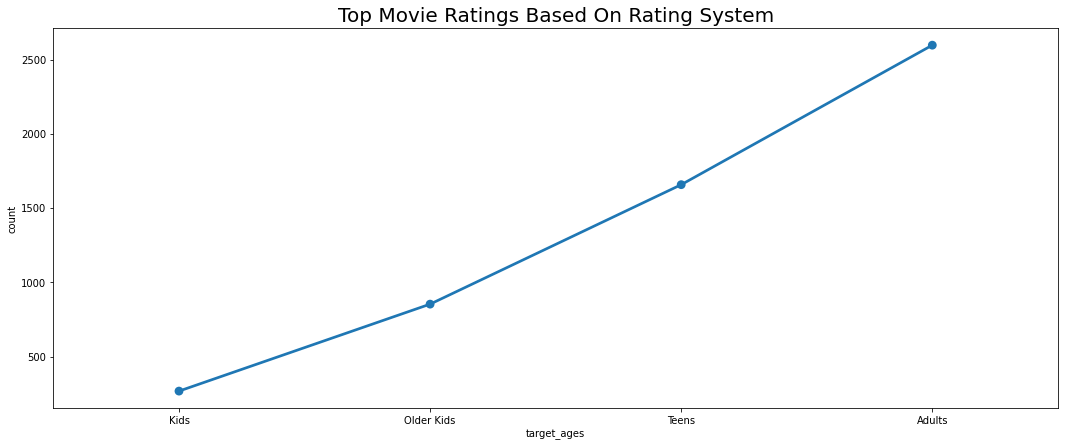

In [ ]:
# Movie의 시청 연령별 컨텐츠 건수

movie_ratings = df_movies.groupby(['target_ages'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='target_ages',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()


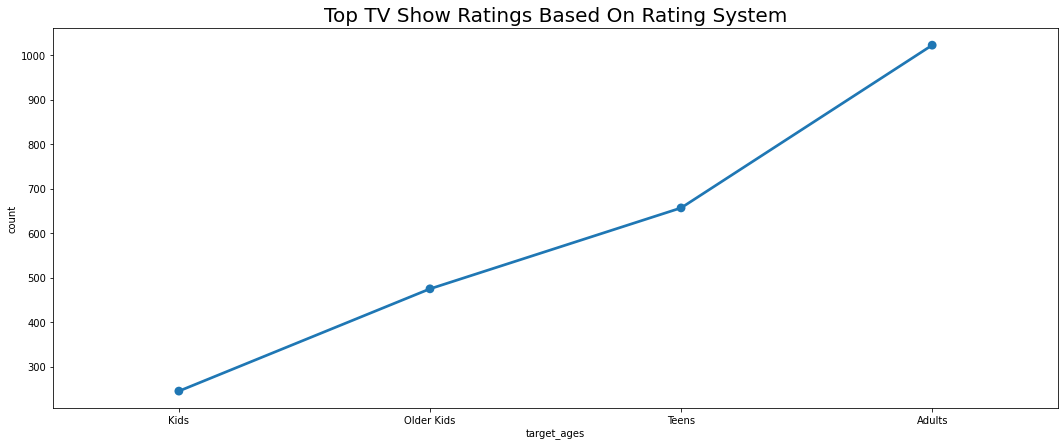

In [ ]:
# TV Show 의 시청 연령별 컨텐츠 건수

tv_ratings = df_tv.groupby(['target_ages'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='target_ages',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()


In [ ]:
# 함수 생성
def generate_rating_df(netflix_df):
    rating_df = netflix_df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df
    
# 시각화 코드
rating_df = generate_rating_df(netflix_df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', title='Ratings of Movies And TV Shows Based On Target Age Groups',  labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS' })
fig.show()


# **데이터 시각화**

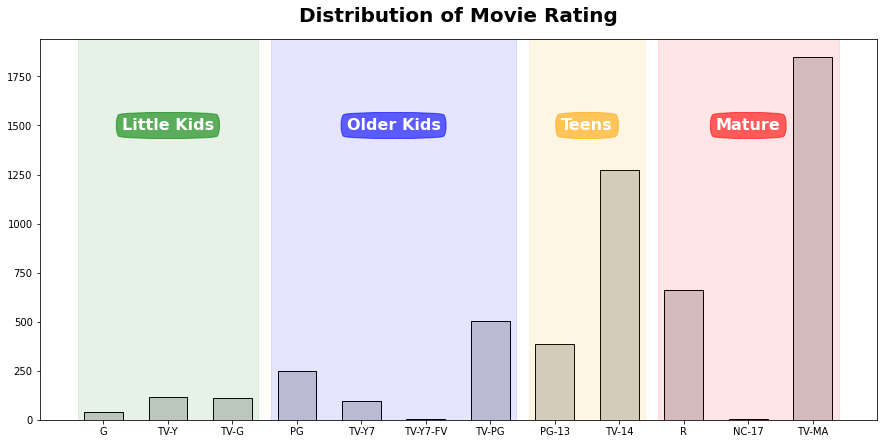

In [ ]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

rating_barplot(movie_rating,'Movie', 1500)


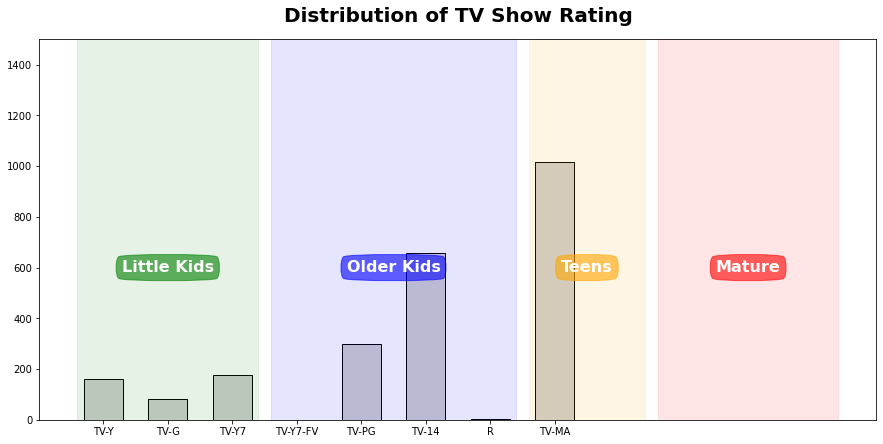

In [ ]:
rating_barplot(tv_rating,'TV Show' , 600, 1500)


# **년도별 컨텐츠 등록 수 시각화**

In [ ]:
df_content = netflix_df['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))


df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_movies1['count']))

t1 = go.Scatter(x=df_movies1['year_added'], y=df_movies1["count"], name="Movies", marker=dict(color="royalblue"))
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1["count"], name="TV Shows", marker=dict(color="red"))
t3 = go.Scatter(x=df_content['year_added'], y=df_content["count"], name="Total Contents", marker=dict(color="black"))

data = [t1, t2, t3]

layout = go.Layout(title="년도별 컨텐츠 등록 추이", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


# **Movies 재생시간 데이터 시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



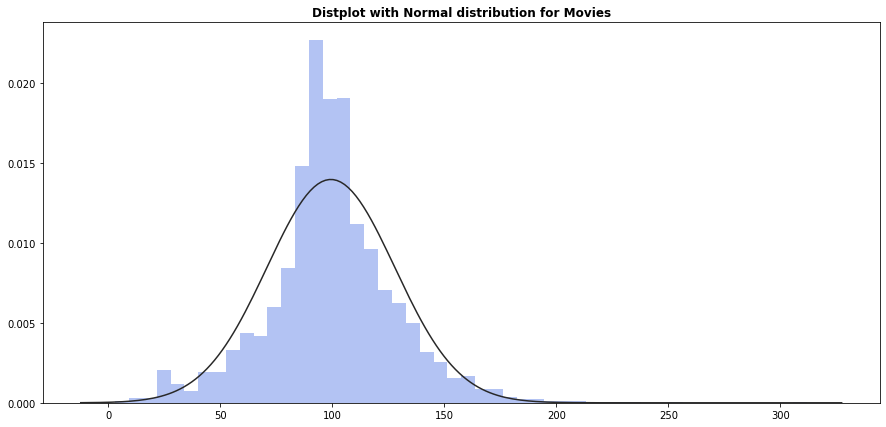

In [ ]:
# Movies의 재생시간 추이 데이터

from scipy.stats import norm

plt.figure(figsize=(15,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False, color=['royalblue'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

대체적으로 85분에서 120분 사이의 데이터가 몰려 있는것을 확인 할 수 있습니다.


# **TV Shows 와 Movies의 10대 장르**

넷플릭스에 있는 데이터에서 TV Shows 와 Movies의 10대 장르는 어떤것이 있는지 확인 해보겠습니다.

각각의 코드와 결과를 확인 해보겠습니다.


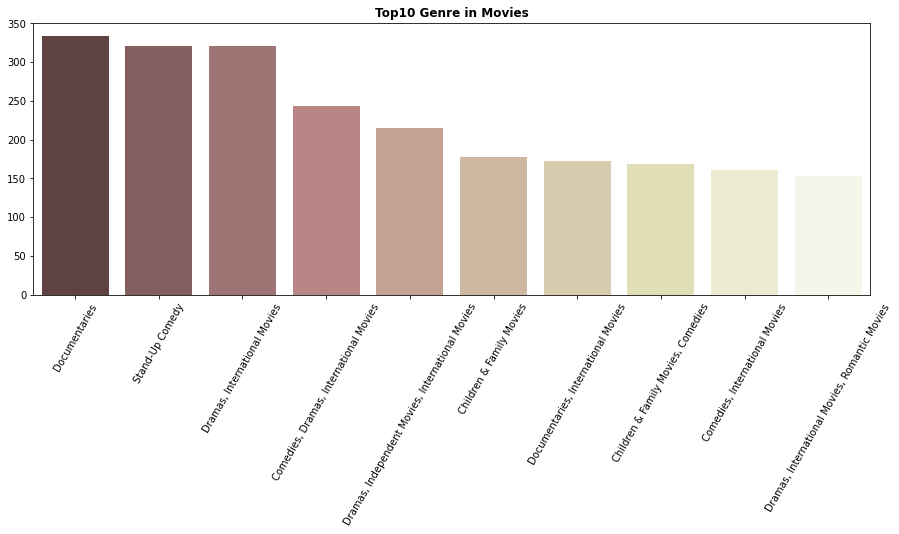

In [ ]:
# Movies의 10대 장르

plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

다음은 TV Shows 입니다.



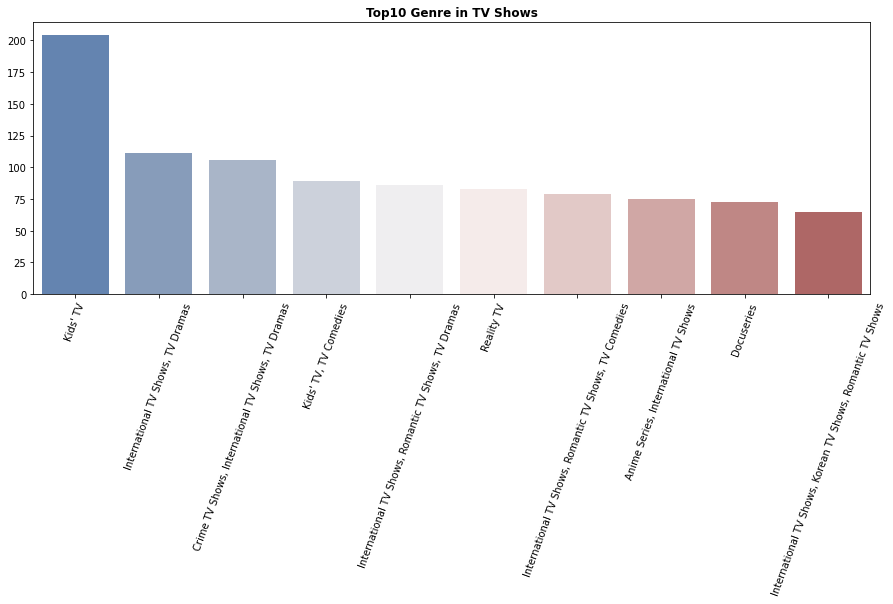

In [ ]:
# TV Shows 의 10대 장르

plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

# **넷플릭스 제작 10대 국가**

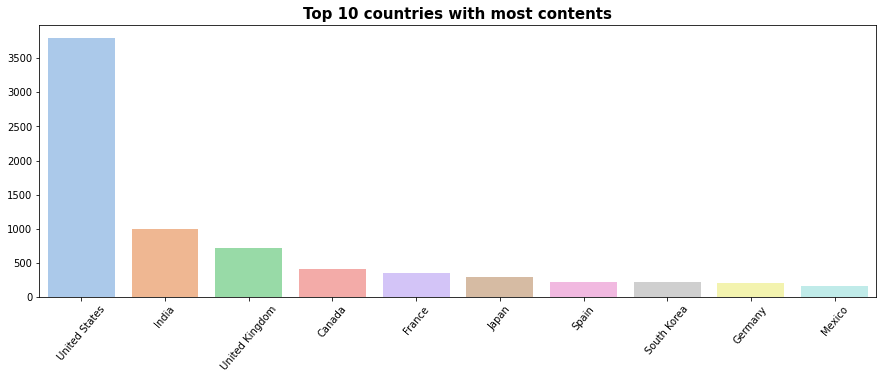

In [ ]:
from collections import Counter
country_data = netflix_df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top20country = country_count.head(10)

plt.figure(figsize=(15,5))
sns.barplot(x= top20country.index, y=top20country, palette="pastel")
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

# **TV Shows와 Moview의 제목을 이용한 Word Cloud**

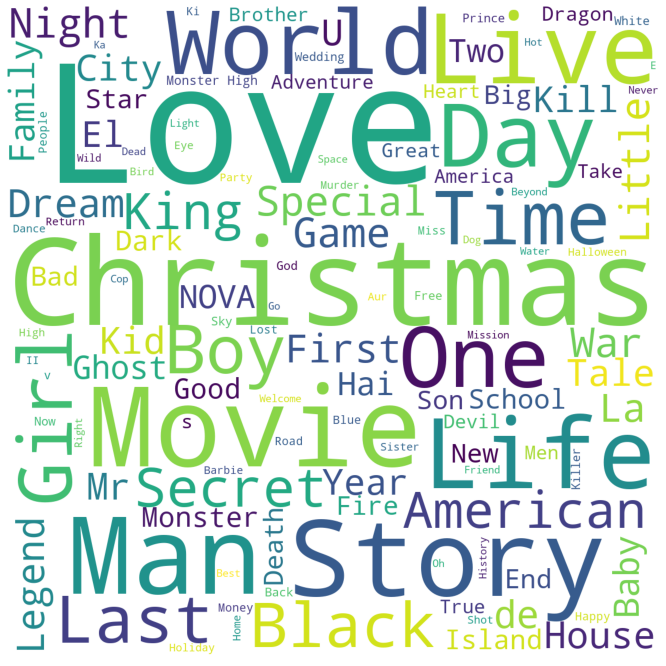

In [ ]:
# Movies의 제목을 이용한 Word Cloud

from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['title'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

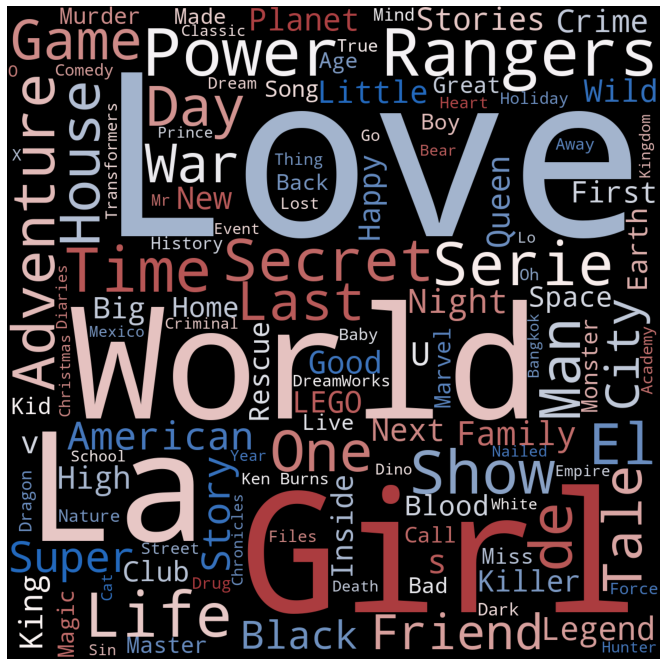

In [ ]:
# TV Show를 이용한 Word Cloud

from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['title'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()